In [1]:
from sklearn.datasets import fetch_covtype
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
# Fetching the Covertype dataset
X,y = fetch_covtype(return_X_y=True,as_frame=True)
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
y.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int32

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [5]:
X.shape

(581012, 54)

In [6]:
y.shape

(581012,)

In [9]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
scaler=StandardScaler()
X_Standardized = scaler.fit_transform(X)

In [11]:
X_Standardized

array([[-1.29780509, -0.93515698, -1.48281978, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-1.31923485, -0.89047967, -1.61636259, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-0.5549068 , -0.14883628, -0.68156292, ..., -0.16595612,
        -0.15601398, -0.12365355],
       ...,
       [-2.04784663,  0.02987297,  0.38677957, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-2.05498988,  0.12816306,  0.11969395, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-2.05856151,  0.08348575, -0.14739167, ..., -0.16595612,
        -0.15601398, -0.12365355]])

In [12]:
# One-hot encoding the targeted labels
n_components = 7
pca = PCA(n_components=n_components)
X_Reduced = pca.fit_transform(X_Standardized)

In [13]:
print(X_Reduced)

[[-2.43871619  1.2720853  -0.80862301 ... -0.74811605 -0.55405307
  -0.64984265]
 [-2.45108053  1.22370832 -0.98020605 ... -0.74676018 -0.5095282
  -0.63856402]
 [-2.71243419  0.73905371 -0.61462962 ... -1.11892296 -1.88098471
  -3.27837534]
 ...
 [ 2.03626091  1.06116575  0.13937007 ... -0.90007842 -0.48122781
   0.04475237]
 [ 2.02812854  0.75788173 -0.2124984  ... -0.92229412 -0.55779558
   0.01117429]
 [ 1.94149231  0.77511296 -0.1672681  ... -0.90581567 -0.63009522
   0.00835834]]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_Reduced, y, test_size=0.2, random_state=42)

In [15]:
from tensorflow.keras.utils import to_categorical

df_reduced = pd.DataFrame(data=X_Reduced, columns=[f'PC{i+1}' for i in range(n_components)])

In [16]:
num_classes = len(np.unique(y))
y_train_encoded = y_train - 1  # Subtracting 1 to ensure classes start from 0
y_test_encoded = y_test - 1

# Converting the integer-encoded labels to one-hot encoded format
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)

In [17]:
# building the model
model = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
    keras.layers.Dense(512, activation=tf.nn.softplus),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)  # Use softmax for multi-class classification
])

optimizer = tf.optimizers.Adam()

In [18]:
model.compile(loss='categorical_crossentropy',  # Using categorical cross-entropy for one-hot encoded targets
              optimizer=optimizer,
              metrics=['accuracy'])

# Training the model with the one-hot encoded labels
history=model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test, y_test_onehot))

Epoch 1/10
14526/14526 [==============================] - 67s 4ms/step - loss: 0.6080 - accuracy: 0.7341 - val_loss: 0.5212 - val_accuracy: 0.7787
Epoch 2/10
14526/14526 [==============================] - 61s 4ms/step - loss: 0.4670 - accuracy: 0.8020 - val_loss: 0.4282 - val_accuracy: 0.8200
Epoch 3/10
14526/14526 [==============================] - 57s 4ms/step - loss: 0.4045 - accuracy: 0.8299 - val_loss: 0.3685 - val_accuracy: 0.8462
Epoch 4/10
14526/14526 [==============================] - 62s 4ms/step - loss: 0.3676 - accuracy: 0.8474 - val_loss: 0.3666 - val_accuracy: 0.8469
Epoch 5/10
14526/14526 [==============================] - 61s 4ms/step - loss: 0.3428 - accuracy: 0.8587 - val_loss: 0.3472 - val_accuracy: 0.8573
Epoch 6/10
14526/14526 [==============================] - 60s 4ms/step - loss: 0.3241 - accuracy: 0.8665 - val_loss: 0.3252 - val_accuracy: 0.8691
Epoch 7/10
14526/14526 [==============================] - 58s 4ms/step - loss: 0.3093 - accuracy: 0.8732 - val_loss: 0

In [19]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test_onehot, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

3632/3632 [==============================] - 9s 3ms/step - loss: 0.2837 - accuracy: 0.8845
Test Loss: 0.2837
Test Accuracy: 0.8845


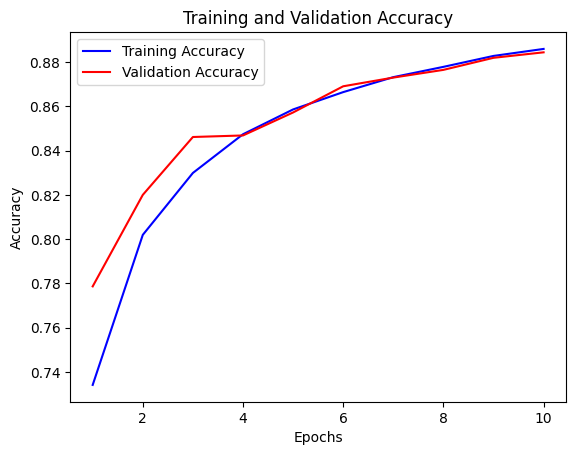

In [20]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plotting the accuracy and validation accuracy graph
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


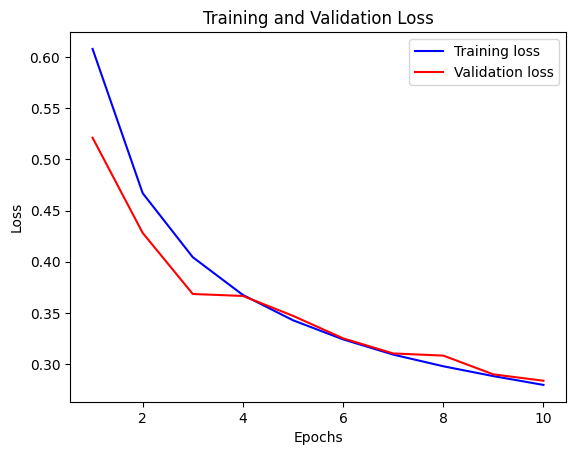

In [21]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting the loss and validation loss graph
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()